<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential
from scipy.misc import toimage
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#use of Learning rate scheduler to avoid overfitting
from keras.callbacks import LearningRateScheduler

In [0]:
from keras.datasets import cifar10 
(X_train_original, y_train_original), (X_test_original, y_test_original) = cifar10.load_data()


##K-Fold 1:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001

In [0]:
split = X_train.shape[0] // 5
X_train_val = X_train[:split]
X_train = X_train[split:]
y_train_val = y_train[:split]
y_train = y_train[split:]


###Model:

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=0.000001)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# model.summary()


 
 


Epoch 1/20
625/625 [==============================] - 34s 54ms/step - loss: 1.9956 - acc: 0.4138 - val_loss: 1.4194 - val_acc: 0.5310
Epoch 2/20
625/625 [==============================] - 37s 60ms/step - loss: 1.4758 - acc: 0.5560 - val_loss: 1.6384 - val_acc: 0.6011
Epoch 3/20
625/625 [==============================] - 32s 51ms/step - loss: 1.2740 - acc: 0.6162 - val_loss: 1.5376 - val_acc: 0.6360
Epoch 4/20
625/625 [==============================] - 31s 50ms/step - loss: 1.1743 - acc: 0.6476 - val_loss: 2.6057 - val_acc: 0.6235
Epoch 5/20
625/625 [==============================] - 32s 52ms/step - loss: 1.0937 - acc: 0.6722 - val_loss: 1.1488 - val_acc: 0.6889
Epoch 6/20
625/625 [==============================] - 32s 51ms/step - loss: 1.0339 - acc: 0.6924 - val_loss: 1.5828 - val_acc: 0.6840
Epoch 7/20
625/625 [==============================] - 31s 50ms/step - loss: 0.9884 - acc: 0.7104 - val_loss: 1.0854 - val_acc: 0.7267
Epoch 8/20
625/625 [==============================] - 32s 51ms

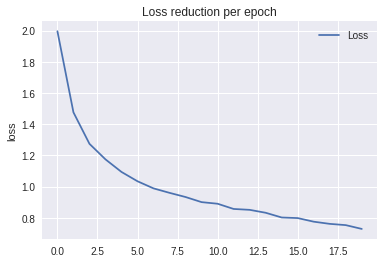

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score1 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score1[0])
print("\nTest accuracy: ", score1[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 2:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[split:2*split]
arg1 = X_train[:split]
arg3 = y_train[:split]
arg2 = X_train[2*split:]
arg4 = y_train[2*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[split:2*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/20
625/625 [==============================] - 31s 50ms/step - loss: 0.7306 - acc: 0.7932 - val_loss: 0.6041 - val_acc: 0.8397
Epoch 2/20
625/625 [==============================] - 31s 50ms/step - loss: 0.7206 - acc: 0.7997 - val_loss: 0.6732 - val_acc: 0.8246
Epoch 3/20
625/625 [==============================] - 32s 52ms/step - loss: 0.7097 - acc: 0.8024 - val_loss: 0.6333 - val_acc: 0.8310
Epoch 4/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6931 - acc: 0.8068 - val_loss: 0.6278 - val_acc: 0.8355
Epoch 5/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6913 - acc: 0.8095 - val_loss: 0.6162 - val_acc: 0.8367
Epoch 6/20
625/625 [==============================] - 32s 51ms/step - loss: 0.6764 - acc: 0.8142 - val_loss: 0.6549 - val_acc: 0.8311
Epoch 7/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6727 - acc: 0.8179 - val_loss: 0.6305 - val_acc: 0.8355
Epoch 8/20
625/625 [==============================] - 32s 52ms

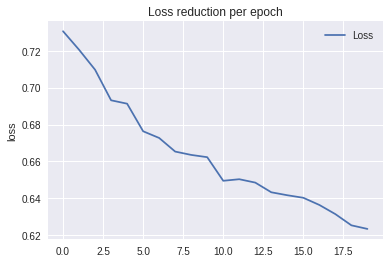

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score2 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score2[0])
print("\nTest accuracy: ", score2[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 3:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[2*split:3*split]
arg1 = X_train[:2*split]
arg3 = y_train[:2*split]
arg2 = X_train[3*split:]
arg4 = y_train[3*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[2*split:3*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6462 - acc: 0.8278 - val_loss: 0.5623 - val_acc: 0.8609
Epoch 2/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6382 - acc: 0.8311 - val_loss: 0.5715 - val_acc: 0.8562
Epoch 3/20
625/625 [==============================] - 32s 51ms/step - loss: 0.6346 - acc: 0.8305 - val_loss: 0.5377 - val_acc: 0.8679
Epoch 4/20
625/625 [==============================] - 32s 51ms/step - loss: 0.6286 - acc: 0.8340 - val_loss: 0.5704 - val_acc: 0.8584
Epoch 5/20
625/625 [==============================] - 33s 52ms/step - loss: 0.6304 - acc: 0.8321 - val_loss: 0.5375 - val_acc: 0.8664
Epoch 6/20
625/625 [==============================] - 32s 51ms/step - loss: 0.6223 - acc: 0.8375 - val_loss: 0.5514 - val_acc: 0.8647
Epoch 7/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6217 - acc: 0.8359 - val_loss: 0.5606 - val_acc: 0.8614
Epoch 8/20
625/625 [==============================] - 32s 52ms

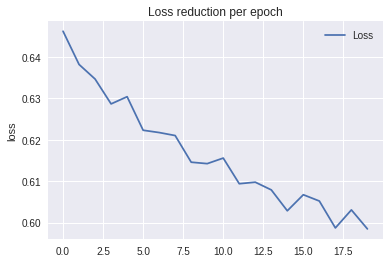

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score3 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score3[0])
print("\nTest accuracy: ", score3[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 4:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[3*split:4*split]
arg1 = X_train[:3*split]
arg3 = y_train[:3*split]
arg2 = X_train[4*split:]
arg4 = y_train[4*split:]

X_train = np.concatenate((arg1, arg2))
y_train_val = y_train[3*split:4*split]
y_train = np.concatenate((arg3, arg4))


Epoch 1/20
625/625 [==============================] - 60s 96ms/step - loss: 0.6104 - acc: 0.8424 - val_loss: 0.5309 - val_acc: 0.8747
Epoch 2/20
625/625 [==============================] - 60s 96ms/step - loss: 0.6002 - acc: 0.8444 - val_loss: 0.5401 - val_acc: 0.8655
Epoch 3/20
625/625 [==============================] - 63s 101ms/step - loss: 0.6004 - acc: 0.8443 - val_loss: 0.5570 - val_acc: 0.8666
Epoch 4/20
625/625 [==============================] - 63s 101ms/step - loss: 0.5971 - acc: 0.8450 - val_loss: 0.5351 - val_acc: 0.8720
Epoch 5/20
625/625 [==============================] - 60s 96ms/step - loss: 0.5931 - acc: 0.8477 - val_loss: 0.4919 - val_acc: 0.8857
Epoch 6/20
625/625 [==============================] - 60s 96ms/step - loss: 0.5950 - acc: 0.8480 - val_loss: 0.6031 - val_acc: 0.8570
Epoch 7/20
625/625 [==============================] - 59s 95ms/step - loss: 0.5906 - acc: 0.8491 - val_loss: 0.5379 - val_acc: 0.8735
Epoch 8/20
625/625 [==============================] - 62s 99

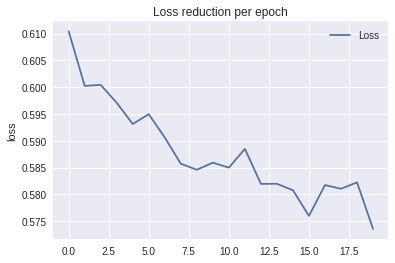

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score4 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score4[0])
print("\nTest accuracy: ", score4[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##K-Fold 5:

In [0]:
#Restart
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001
split = X_train.shape[0] // 5

#change per each Fold
X_train_val = X_train[4*split:]


X_train = X_train[:4*split]
y_train_val = y_train[4*split:]
y_train = y_train[:4*split]


Epoch 1/20
625/625 [==============================] - 61s 98ms/step - loss: 0.5952 - acc: 0.8479 - val_loss: 0.4674 - val_acc: 0.8914
Epoch 2/20
625/625 [==============================] - 61s 98ms/step - loss: 0.5930 - acc: 0.8502 - val_loss: 0.4814 - val_acc: 0.8866
Epoch 3/20
625/625 [==============================] - 61s 98ms/step - loss: 0.5843 - acc: 0.8505 - val_loss: 0.4927 - val_acc: 0.8832
Epoch 4/20
625/625 [==============================] - 60s 96ms/step - loss: 0.5868 - acc: 0.8500 - val_loss: 0.4832 - val_acc: 0.8866
Epoch 5/20
625/625 [==============================] - 63s 100ms/step - loss: 0.5821 - acc: 0.8528 - val_loss: 0.5428 - val_acc: 0.8629
Epoch 6/20
625/625 [==============================] - 62s 100ms/step - loss: 0.5846 - acc: 0.8499 - val_loss: 0.5250 - val_acc: 0.8771
Epoch 7/20
625/625 [==============================] - 62s 100ms/step - loss: 0.5755 - acc: 0.8534 - val_loss: 0.5058 - val_acc: 0.8830
Epoch 8/20
625/625 [==============================] - 60s 9

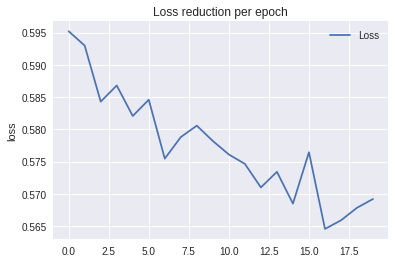

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 20
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_train_val,y_train_val])
                              
score5 = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score5[0])
print("\nTest accuracy: ", score5[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


#Results:

Averaging the loss and accuracy:

In [0]:
Loss_final = (score1[0] + score2[0] + score3[0] + score4[0] + score5[0]) /5 
print("Final K-Fold Loss: ")
print(Loss_final)

Accuracy_final = (score1[1] + score2[1] + score3[1] + score4[1] + score5[1]) /5 
print("Final K-Fold Accuracy: ")
print(Accuracy_final)

Final K-Fold Loss: 
0.6483644952392578
Final K-Fold Accuracy: 
0.8384


Comparing to the best Architecture results:    
loss: 0.696  
Accuracy : 83.300  
Therefore we see improvment in the models Accuracy with K-Fold